In [ ]:
"""
Dataset: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

Use the keras package and neural networks to build a regression model that predicts the prices of houses based on the characteristics of the house and its neighborhood.
"""

import matplotlib.pyplot as plt
from keras import Sequential
from keras.datasets import boston_housing
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [ ]:
# load dataset and split into training and testing data
# Dataset Info: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [ ]:
# normalize data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Regression model with a neural network
model = Sequential()
model.add(Dense(8, input_dim=13, activation='relu'))  #input_dim = size of feature vector
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# mse = mean squared error, mae = mean absolute error
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
# split into validation and training data and train model
history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 593.8781 - mae: 22.5396
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 554.3383 - mae: 21.8164
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 546.3043 - mae: 21.5919
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 564.9521 - mae: 21.8592
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 507.9516 - mae: 20.5498
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 510.5405 - mae: 20.5750
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 549.4613 - mae: 21.1973
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 552.4308 - mae: 21.2156
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 475.8733 - mae: 19.6666
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 455.5785 - mae: 18.9523
Epoch 11/100
13/13 [=========

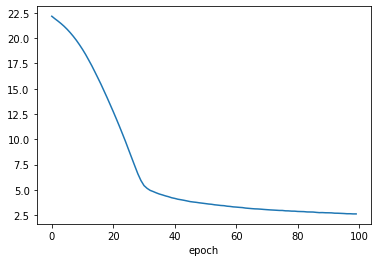

In [ ]:
# plot mean absolute error of training data
plt.plot(history.history['mae'])
plt.xlabel('epoch')
plt.show()

In [ ]:
# first value is mse (average error)
# second value is mae (median error)
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 23.4615 - mae: 3.5030


[23.46150779724121, 3.5029776096343994]

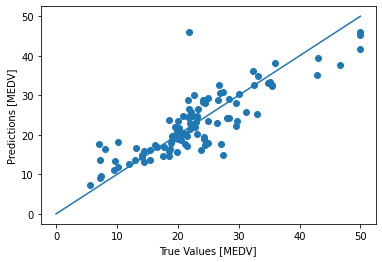

In [ ]:
# plot predictions and actual values of test data
y_pred = model.predict(x_test).flatten()
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
lims = [0, 50]
plt.plot(lims, lims)
plt.show()